In [1]:
# Initially write the imports for the dataset
import os
import torch
import csv


class PointsDataset:
    def __init__(self,location):
        self.dataset = []
        with open(location, "r") as file:
            while(file.readline()!=''):
                self.dataset.append(file.readline())
        return       
    
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, i):
        return self.dataset[i]

ds = PointsDataset("dataset1.txt")
print(ds.__len__())
print(ds.__getitem__(1))


50
2.190182077823536 6.24970978934776



In [2]:
import torch

class LineModule(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand(1))
        
    

    def forward(self, input):
        return self.w * input
    
model = LineModule()
print(list(model.parameters()))
print(model(torch.tensor([2.0])))


[Parameter containing:
tensor([0.4267], requires_grad=True)]
tensor([0.8535], grad_fn=<MulBackward0>)


In [3]:
import torch

# convert the dataset to a tensor
data = open("dataset1.txt", "r")

ds = []

for line in data:
    ds.append([float(x) for x in line.split()])

ds = torch.tensor(ds)

dl = torch.utils.data.DataLoader(ds, batch_size=8)
# the parameters passed above are the dataset, batch size and shuffle
# and mean that the dataloader will return 2 samples at a time and shuffle the dataset before returning the samples

model = LineModule()

loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    for batch in dl:
        y = model(batch[:,0])
        l = loss(y, batch[:,1])
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f"Epoch {epoch} Loss: {l.item()}")

# the above code is the training loop for the model:
# 1. zero the gradients (this is necessary because pytorch accumulates gradients)
# 2. calculate the model output
# 3. calculate the loss
# 4. backpropagate the loss
# 5. update the model parameters


/home/herocod/anaconda3/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789220573/work/c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0 Loss: 51.96481704711914
Epoch 1 Loss: 8.3247709274292
Epoch 2 Loss: 3.0648386478424072
Epoch 3 Loss: 3.1392226219177246
Epoch 4 Loss: 3.5685274600982666
Epoch 5 Loss: 3.817833662033081
Epoch 6 Loss: 3.9343338012695312
Epoch 7 Loss: 3.9852020740509033
Epoch 8 Loss: 4.006858825683594
Epoch 9 Loss: 4.015985012054443
Epoch 10 Loss: 4.019814491271973
Epoch 11 Loss: 4.021418571472168
Epoch 12 Loss: 4.0220842361450195
Epoch 13 Loss: 4.022375106811523
Epoch 14 Loss: 4.022486209869385
Epoch 15 Loss: 4.022544860839844
Epoch 16 Loss: 4.02256441116333
Epoch 17 Loss: 4.022576332092285
Epoch 18 Loss: 4.022579669952393
Epoch 19 Loss: 4.022579669952393
Epoch 20 Loss: 4.022579669952393
Epoch 21 Loss: 4.022579669952393
Epoch 22 Loss: 4.022579669952393
Epoch 23 Loss: 4.022579669952393
Epoch 24 Loss: 4.022579669952393
Epoch 25 Loss: 4.022579669952393
Epoch 26 Loss: 4.022579669952393
Epoch 27 Loss: 4.022579669952393
Epoch 28 Loss: 4.022579669952393
Epoch 29 Loss: 4.022579669952393
Epoch 30 Loss: 4.

In [4]:
class PolyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.rand(1))
        self.b = torch.nn.Parameter(torch.rand(1))
        self.c = torch.nn.Parameter(torch.rand(1))
        self.d = torch.nn.Parameter(torch.rand(1))
        self.e = torch.nn.Parameter(torch.rand(1))
    
        
    

    def forward(self, input):
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        e = self.e
        pred = a * input[:,0]**4 + b * input[:,0]**3 + c * input[:,0]**2 + d * input[:,0] + e
        classe = pred - input[:,1]
        # for every sample in classe, if the value is <0.5, set it to 0, else set it to 1
        classe[classe < 0.5] = 0
        classe[classe >= 0.5] = 1
        
        # transpose pred and classe into columns instead of rows
        pred = pred.view(-1,1)
        classe = classe.view(-1,1)
        # concatenate pred and classe into a single tensor with two columns
        res = torch.cat((pred,classe),1)
        return res


In [5]:
import torch

# convert the dataset to a tensor
data = open("dataset2.txt", "r")

ds = []

for line in data:
    ds.append([float(x) for x in line.split()])

ds = torch.tensor(ds)

dl = torch.utils.data.DataLoader(ds, batch_size=8)
# the parameters passed above are the dataset, batch size and shuffle
# and mean that the dataloader will return 2 samples at a time and shuffle the dataset before returning the samples

model = PolyModel()

loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# i need to predict the class of the point in the dataset (the third column)
for epoch in range(1000):
    for batch in dl:
        y = model(batch[:, [0,1]]) # predicts y from the x and the class with the prediction over y

        l = loss(y, batch[:, [1,2]]) 
        # above calculates the loss penalizing both wrong y and wrong class with mean squared error

        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f"Epoch {epoch} Loss: {l.item()}")



Epoch 0 Loss: 0.38424864411354065
Epoch 1 Loss: 0.33086246252059937
Epoch 2 Loss: 0.28478771448135376
Epoch 3 Loss: 0.2640628218650818
Epoch 4 Loss: 0.25355178117752075
Epoch 5 Loss: 0.24758212268352509
Epoch 6 Loss: 0.24381864070892334
Epoch 7 Loss: 0.30371859669685364
Epoch 8 Loss: 0.3017839193344116
Epoch 9 Loss: 0.30026179552078247
Epoch 10 Loss: 0.2990161180496216
Epoch 11 Loss: 0.29796847701072693
Epoch 12 Loss: 0.29707053303718567
Epoch 13 Loss: 0.2962902784347534
Epoch 14 Loss: 0.29560521245002747
Epoch 15 Loss: 0.2949986159801483
Epoch 16 Loss: 0.29445767402648926
Epoch 17 Loss: 0.2939721941947937
Epoch 18 Loss: 0.2935340404510498
Epoch 19 Loss: 0.2931365370750427
Epoch 20 Loss: 0.29277411103248596
Epoch 21 Loss: 0.292442262172699
Epoch 22 Loss: 0.2921372056007385
Epoch 23 Loss: 0.29185566306114197
Epoch 24 Loss: 0.2915950417518616
Epoch 25 Loss: 0.2913529574871063
Epoch 26 Loss: 0.2911275029182434
Epoch 27 Loss: 0.2909170389175415
Epoch 28 Loss: 0.2907201051712036
Epoch 29 Lo

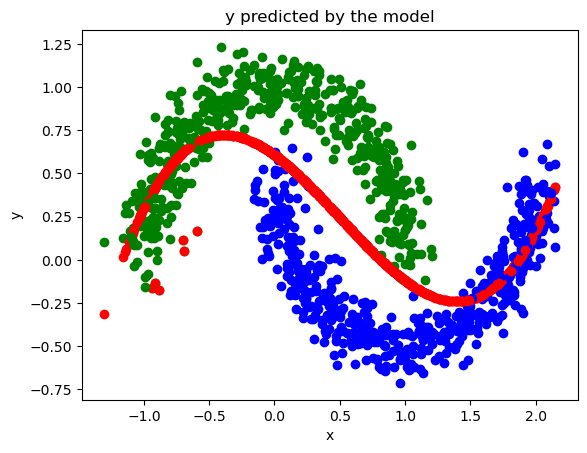

In [6]:
# create a graph for what the model outputs between -1 and 2 for the x axis
import matplotlib.pyplot as plt
import numpy as np

# use the x and y from the dataset to plot the y values predicted by the model, which needs both as input

dl = torch.utils.data.DataLoader(ds, batch_size=1)

for batch in dl:
    y_pred = model(batch[:1]) # predicts y and class from the x and the y with the prediction over y
    x = batch[0,0]
    # concatenate x and y_pred into a single tensor with two columns, discarding class for later plotting
    res = torch.cat((x.view(-1,1),y_pred[:,0].view(-1,1)),1)
    plt.plot(res[:,0].detach().numpy(), res[:,1].detach().numpy(), 'ro')
    # add original points to the plot, with color corresponding to the class in the batch
    if(batch[0,2]==1):
        plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'bo')
        # if class is different from prediction, circle the point in red
        if(y_pred[0,1]<0):
            plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'ro')
    else:
        plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'go')
        # if class is different from prediction, circle the point in red
        if(y_pred[0,1]>0):
            plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'ro')


plt.xlabel('x')
plt.ylabel('y')
plt.title('y predicted by the model')
plt.show()



In [7]:
class PolyModel_x(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.rand(1))
        self.b = torch.nn.Parameter(torch.rand(1))
        self.c = torch.nn.Parameter(torch.rand(1))
        self.d = torch.nn.Parameter(torch.rand(1))
        self.e = torch.nn.Parameter(torch.rand(1))
  
    def forward(self, x):
        return self.a*x.pow(4) + self.b*x.pow(3) + self.c*x.pow(2) + self.d*x + self.e


In [8]:
import torch

# convert the dataset to a tensor
data = open("dataset2.txt", "r")

ds = []

for line in data:
    ds.append([float(x) for x in line.split()])

ds = torch.tensor(ds)

dl = torch.utils.data.DataLoader(ds, batch_size=8)
# the parameters passed above are the dataset, batch size and shuffle
# and mean that the dataloader will return 2 samples at a time and not shuffle the dataset before returning the samples

model = PolyModel_x()

loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# i need to predict the class of the point in the dataset (the third column)
for epoch in range(1000):
    for batch in dl:
        x = batch[:,0]
        y = batch[:,1]
        c = batch[:,2]

        y_pred = model(batch[:, 0]) # predicts y from the x

        predicted_above = y_pred > y
        actual_above = c == 1

        predicted_below = y_pred < y
        actual_below = c == 0

        errors = torch.abs(y_pred - y)
        errors[predicted_above == actual_above] = 0
        errors[predicted_below == actual_below] = 0
        
        l = torch.mean(errors)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()

    print(f"Epoch {epoch} Loss: {l.item()}")



Epoch 0 Loss: 0.15579994022846222
Epoch 1 Loss: 0.13230811059474945
Epoch 2 Loss: 0.10971815139055252
Epoch 3 Loss: 0.08796169608831406
Epoch 4 Loss: 0.06688957661390305
Epoch 5 Loss: 0.04629187285900116
Epoch 6 Loss: 0.02809564769268036
Epoch 7 Loss: 0.014885373413562775
Epoch 8 Loss: 0.0022975504398345947
Epoch 9 Loss: 0.0
Epoch 10 Loss: 0.0
Epoch 11 Loss: 0.0
Epoch 12 Loss: 0.0
Epoch 13 Loss: 0.0
Epoch 14 Loss: 0.0
Epoch 15 Loss: 0.0
Epoch 16 Loss: 0.002584390342235565
Epoch 17 Loss: 0.005358148366212845
Epoch 18 Loss: 0.007836304605007172
Epoch 19 Loss: 0.010016435757279396
Epoch 20 Loss: 0.011989619582891464
Epoch 21 Loss: 0.013729147613048553
Epoch 22 Loss: 0.015360992401838303
Epoch 23 Loss: 0.016802243888378143
Epoch 24 Loss: 0.01806923747062683
Epoch 25 Loss: 0.01925751008093357
Epoch 26 Loss: 0.0202708188444376
Epoch 27 Loss: 0.02122512459754944
Epoch 28 Loss: 0.022037873044610023
Epoch 29 Loss: 0.02281886897981167
Epoch 30 Loss: 0.023570530116558075
Epoch 31 Loss: 0.02419591

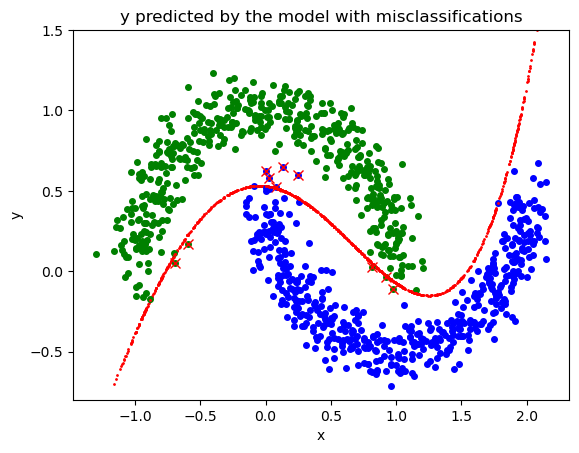

In [9]:
# create a graph for what the model outputs between -1 and 2 for the x axis
import matplotlib.pyplot as plt
import numpy as np

# use the x and y from the dataset to plot the y values predicted by the model, which needs both as input

dl = torch.utils.data.DataLoader(ds, batch_size=1)

for batch in dl:
    y_pred = model(batch[0,0]) # predicts y from the x
    x = batch[0,0]
    # concatenate x and y_pred into a single tensor with two columns, discarding class for later plotting
    res = torch.cat((x.view(-1,1), y_pred.view(-1,1)), 1)
    # add original points to the plot, with color corresponding to the class in the batch
    if(batch[0,2]==1):
        plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'bo', markersize=4)
        # if class is different from prediction, circle the point in red
        if(y_pred[0]-batch[0,1]<0):
            plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'rx', markersize=7)
    else:
        plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'go', markersize=4)
        # if class is different from prediction, circle the point in red
        if(y_pred[0]-batch[0,1]>0):
            plt.plot(batch[0,0].detach().numpy(), batch[0,1].detach().numpy(), 'rx', markersize=7)
    
    plt.plot(res[:,0].detach().numpy(), res[:,1].detach().numpy(), 'ro', markersize=1)

plt.ylim(-0.8, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y predicted by the model with misclassifications')
plt.show()

